#Data: Melbourne Housing Market

https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

#**1-Importing required libraries**

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection, sklearn.metrics, sklearn.ensemble, sklearn.linear_model, sklearn.tree, sklearn.neighbors

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

#**2-Project Definition**

For this project, we need to load the Melbourne Housing dataset into our project. The
quality and amount of data we collect will determine how good our predictive model
can be. For this reason, we need to examine the dataset very carefully. We will
estimate the price of a house using the Melbourne Housing dataset, which is a
real-life example. Before evaluating any cost, we will start by analyzing the data
using preprocessing techniques. We will then build our models and measure their
performance to complete the project.

#**3-Gathering and Observing Data**

In [256]:
df = pd.read_csv('Melbourne_housing_FULL.csv') #Opening .csv file
df_copy = df.copy() #Copying and storing the original data
df_copy.head() #Checking first five lines of DataFreame


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [257]:
#About the dataFrame
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [258]:
print('Shape:', df_copy.shape,
      "\nSize:", df_copy.size,
      "\nDimension:", df_copy.ndim)

Shape: (34857, 21) 
Size: 731997 
Dimension: 2


#**4-Exploratory Data Analysis**

Finding and handling outlier values with z-score method. Higher outlier datas decreased to right limit and lower outlier values increassed to left limit.

In [259]:
numeric_columns = ['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt'
,'Lattitude','Longtitude','Propertycount']


for column in numeric_columns:
  #Calcualting limits
  right_limit = df_copy[column].mean() + 3*df_copy[column].std()
  left_limit = df_copy[column].mean() - 3*df_copy[column].std()
  print('{} -> left limit: {:.2f}, right_limit:{:.2f}'.format(column, left_limit, right_limit))

  deal_high = right_limit = df_copy[column].mean() + 2*df_copy[column].std()
  deal_low = df_copy[column].mean() - 2*df_copy[column].std()
  #Handling outler values
  df_copy.loc[df_copy[column] > right_limit, column] = deal_high
  df_copy.loc[df_copy[column] < left_limit, column] = deal_low

Rooms -> left limit: 0.12, right_limit:5.94
Distance -> left limit: -9.18, right_limit:31.55
Postcode -> left limit: 2788.99, right_limit:3443.13
Bedroom2 -> left limit: 0.14, right_limit:6.03
Bathroom -> left limit: -0.55, right_limit:3.80
Car -> left limit: -1.30, right_limit:4.76
Landsize -> left limit: -9602.93, right_limit:10790.12
BuildingArea -> left limit: -1043.54, right_limit:1364.06
YearBuilt -> left limit: 1853.31, right_limit:2077.27
Lattitude -> left limit: -38.08, right_limit:-37.54
Longtitude -> left limit: 144.64, right_limit:145.36
Propertycount -> left limit: -5711.38, right_limit:20857.16


Finding and dropping duplicated values.

In [260]:
print("Duplicating values:", df_copy.duplicated().sum())
df_copy.loc[df_copy.duplicated(keep=False), :]

Duplicating values: 1


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3.00,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3.00,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


Cleaning the duplications

In [237]:
df_copy.drop_duplicates(inplace=True)
print("Duplicating values After Dropping:", df_copy.duplicated().sum())

Duplicating values After Dropping: 0


Checking for null values

In [238]:
df_copy.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Filling the null numeric values with mode values

In [261]:
filler_values = {'Distance':df_copy['Distance'].mode(),
                 'Bedroom2':df_copy['Bedroom2'].mode(),
                 'Bathroom':df_copy['Bathroom'].mode(),
                 'Car':df_copy['Car'].mode(),
                 'Landsize':df_copy['Landsize'].mode(),
                 'BuildingArea':df_copy['BuildingArea'].mode(),
                 'YearBuilt':df_copy['YearBuilt'].mode(),
                 'Lattitude':df_copy['Lattitude'].mode(),
                 'Longtitude':df_copy['Longtitude'].mode(),
                 'Propertycount':df_copy['Propertycount'].mode()
                 }
df_copy.fillna(value=filler_values, inplace=True)

Seperating null prices for test set

In [262]:
na_prices = df_copy[df_copy['Price'].isnull()].copy()
na_prices
df_copy.dropna(inplace=True)

Summary of our data

In [263]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,8887.00,3.09,0.93,1.00,2.00,3.00,4.00,4.97
Price,8887.00,1092901.63,679381.90,131000.00,641000.00,900000.00,1345000.00,9000000.00
Distance,8887.00,10.87,5.81,0.00,6.40,10.20,13.90,24.76
Postcode,8887.00,3103.20,72.30,3000.00,3044.00,3084.00,3150.00,3334.11
Bedroom2,8887.00,3.07,0.93,1.00,2.00,3.00,4.00,5.05
Bathroom,8887.00,1.63,0.66,1.00,1.00,2.00,2.00,3.07
Car,8887.00,1.66,0.85,0.00,1.00,2.00,2.00,3.75
Landsize,8887.00,500.75,581.96,0.00,212.00,478.00,652.00,7391.28
BuildingArea,8887.00,148.98,81.50,0.00,100.00,132.00,180.00,962.79
YearBuilt,8887.00,1965.85,36.08,1854.00,1945.00,1970.00,2000.00,2019.00


In [264]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

#Visualization

Plotting price distrubition histogram

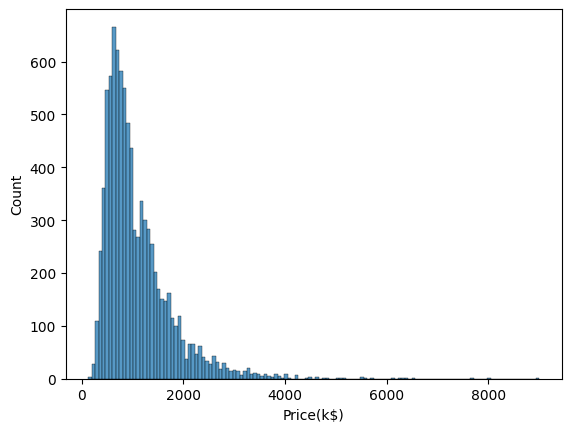

In [265]:
fig = sns.histplot(data=df_copy['Price']/1000)
fig.set_xlabel('Price(k$)')
plt.show()

Pair scatter tablo for distribution of each numeric values

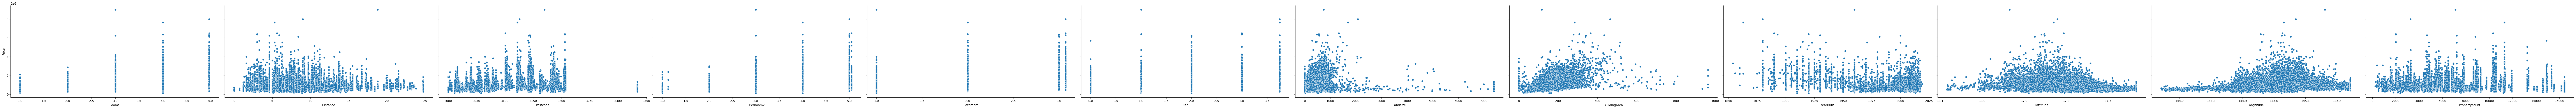

In [266]:
numeric_datas = ['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt'
,'Lattitude','Longtitude','Propertycount']
fig = sns.pairplot(data=df_copy,x_vars=numeric_datas,y_vars='Price',height=5, aspect=2)
plt.show()

#Correlation Matrix

<ipython-input-267-6a93d7c1df99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_copy.corr()


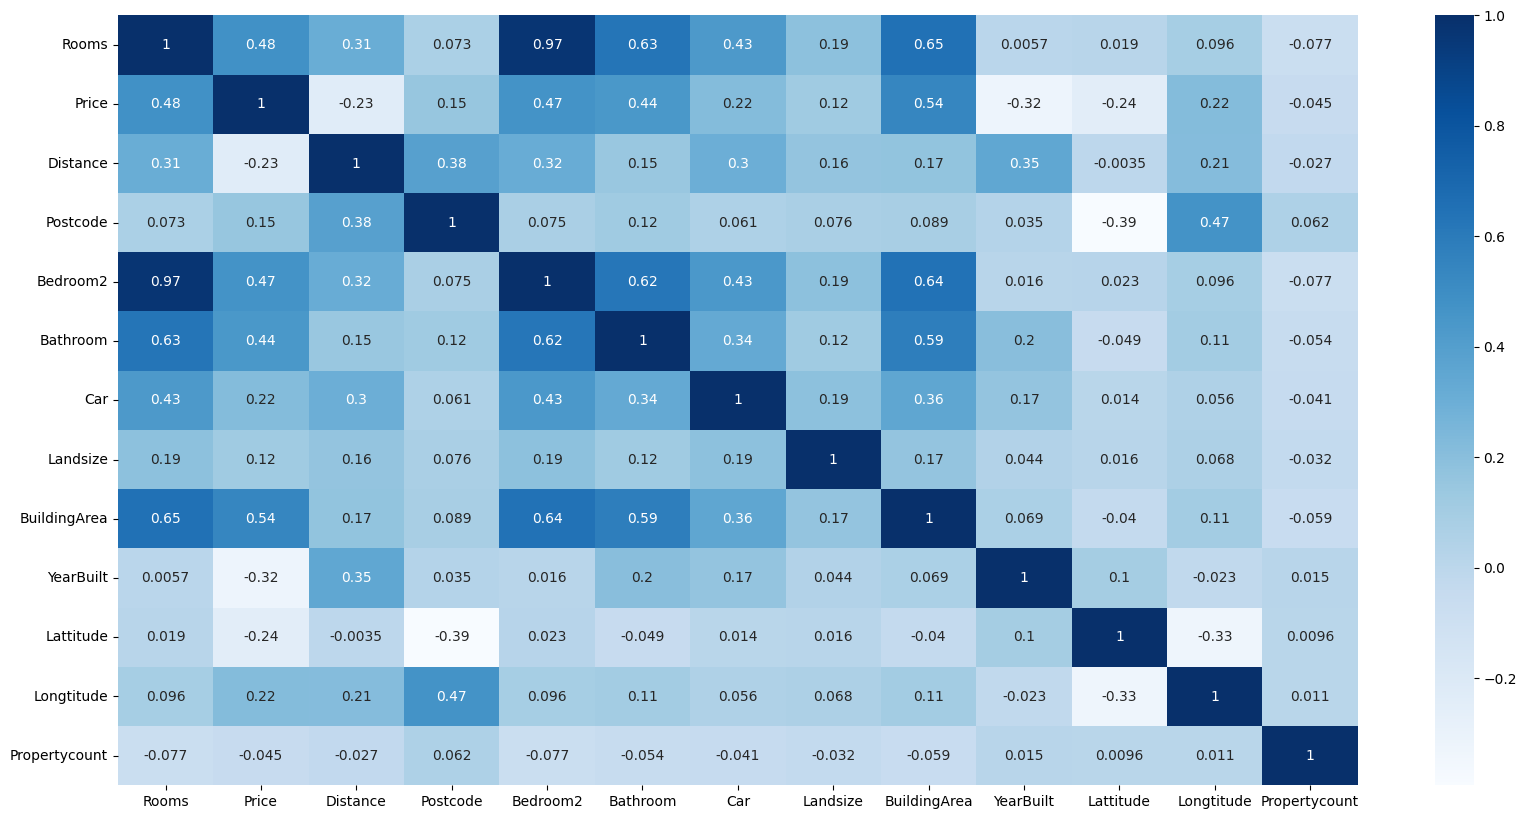

In [267]:
corr = df_copy.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

#Label and One Hot Encoding

Encoding of categorical values

Label Encoder:

In [268]:
from sklearn.preprocessing import LabelEncoder
categorical_data = ['Type','Regionname','Method']
label_encoder = LabelEncoder()
for col in categorical_data:
  df_copy[col] = label_encoder.fit_transform(df_copy[col])

One Hot Encoder

In [269]:
def one_hot_encoder(dataframe, categorical_col, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_col, drop_first=drop_first)
    return dataframe

df_copy = one_hot_encoder(df_copy,categorical_data)

Standard Scaler

In [270]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit_transform(df_copy[numeric_columns])

array([[-1.17064765, -1.44135952, -0.50080463, ..., -0.04274101,
         0.01179616, -0.82492709],
       [-0.09371747, -1.44135952, -0.50080463, ..., -0.05955923,
         0.0208418 , -0.82492709],
       [ 0.98321271, -1.44135952, -0.50080463, ..., -0.0343319 ,
         0.01812811, -0.82492709],
       ...,
       [-1.17064765, -0.78719084, -1.2477856 , ..., -0.13416004,
        -0.93926281, -0.20072334],
       [-1.17064765, -0.78719084, -1.2477856 , ..., -0.22245569,
        -1.02700556, -0.20072334],
       [-1.17064765, -0.78719084, -1.2477856 , ..., -0.16527375,
        -0.89177318, -0.20072334]])

#Model Training

In [271]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   float64
 3   Price          8887 non-null   float64
 4   SellerG        8887 non-null   object 
 5   Date           8887 non-null   object 
 6   Distance       8887 non-null   float64
 7   Postcode       8887 non-null   float64
 8   Bedroom2       8887 non-null   float64
 9   Bathroom       8887 non-null   float64
 10  Car            8887 non-null   float64
 11  Landsize       8887 non-null   float64
 12  BuildingArea   8887 non-null   float64
 13  YearBuilt      8887 non-null   float64
 14  CouncilArea    8887 non-null   object 
 15  Lattitude      8887 non-null   float64
 16  Longtitude     8887 non-null   float64
 17  Propertycount  8887 non-null   float64
 18  Type_1 

Splitting and labeling for test and train data

In [272]:
from sklearn.model_selection import train_test_split
y = df_copy["Price"]
X = df_copy.drop(["Price",'Suburb','Address','SellerG','Date','CouncilArea'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


Shape of x_train is (7109, 25)
Shape of x_test is (1778, 25)
Shape of y_train is (7109,)
Shape of y_test is (1778,)


Models that are will be used

In [273]:
models = {
'Lasso': {
'model': sklearn.linear_model.Lasso()
},
'LinearRegression': {
'model': sklearn.linear_model.LinearRegression()
},
'Ridge': {
'model': sklearn.linear_model.Ridge()
},
'ElasticNet': {
'model': sklearn.linear_model.ElasticNet()
},
'KNeighborsRegressor': {
'model': sklearn.neighbors.KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': sklearn.ensemble.RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': sklearn.ensemble.GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': sklearn.ensemble.AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}
}

#Model Tests and Scores

In [274]:
for name in models:
  print(name,'\n============')
  models[name]['model'].fit(X_train,y_train)
  y_pred = models[name]['model'].predict(X_test)
  print('MAE Score', sklearn.metrics.mean_absolute_error(y_test,y_pred))
  print('RMSE Score' ,sklearn.metrics.mean_squared_error(y_test,y_pred,squared=False))
  print('MSE Score' ,sklearn.metrics.mean_squared_error(y_test,y_pred,squared=True))
  print('R2 Score:',models[name]['model'].score(X_test,y_test))
  print('\n')


Lasso 
MAE Score 243970.14979086097
RMSE Score 337865.61804021447
MSE Score 114153175853.69609
R2 Score: 0.7028896496362712


LinearRegression 
MAE Score 243972.31139315382
RMSE Score 337867.8491875222
MSE Score 114154683514.60225
R2 Score: 0.7028857255959919


Ridge 
MAE Score 243967.42687972117
RMSE Score 337832.759052708
MSE Score 114130973089.16507
R2 Score: 0.7029474375260913


ElasticNet 
MAE Score 249821.17451777254
RMSE Score 361666.4279785574
MSE Score 130802605126.76906
R2 Score: 0.6595556142256509


KNeighborsRegressor 
MAE Score 226742.19775028122
RMSE Score 366657.08175669704
MSE Score 134437415602.33723
R2 Score: 0.6500951694695111


RandomForestRegressor 
MAE Score 149281.71032808398
RMSE Score 243616.9622605495
MSE Score 59349224301.05801
R2 Score: 0.8455297568899662


GradientBoostingRegressor 
MAE Score 167577.65298221834
RMSE Score 258306.08767632252
MSE Score 66722034930.64802
R2 Score: 0.8263402920946074


AdaBoostRegressor 
MAE Score 307383.8963062137
RMSE Score 4